In [1]:
%pylab inline
import numpy as np
from distribution import *
from proposal import *
from sampler import Sampler

Populating the interactive namespace from numpy and matplotlib


### The acceptance seems too high. Expect potential bugs.

### Example of sampling from a multivariate gaussian

In [3]:
dim = 5
nwalkers = 100
niters = 1000

In [4]:
mu = np.random.randn(dim)

cov = 0.5 - np.random.rand(dim ** 2).reshape((dim, dim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

t_dist = MultivariateGaussian(cov=cov, mu=mu, dim=dim)
proposal = PCNWalkMove(s=3, beta=0.99)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

In [5]:
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

proposal/walk.py:57: RuntimeWarning: covariance is not positive-semidefinite.
  + beta * rand.multivariate_normal(np.zeros_like(walkers_to_move[i]), cov)


In [6]:
np.mean(hist.get('chain'), axis=0).shape

(1000, 5)

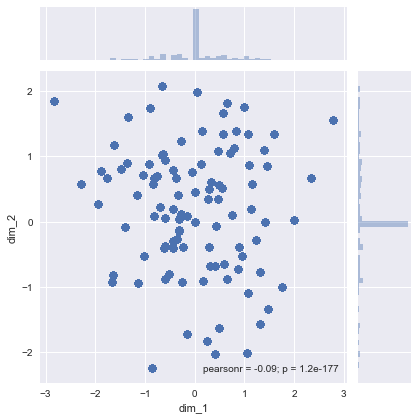

In [7]:
hist.plot_scatter(dim=[[0, 1]])

In [8]:
hist.acceptance_rate

32.710999999999999

In [11]:
hist.get('lnprob')

array([[[  70.05629264],
        [  35.21185667],
        [ 222.15266216],
        ..., 
        [   0.        ],
        [-316.6728333 ],
        [   0.        ]],

       [[ -41.44331825],
        [   0.        ],
        [  32.59071174],
        ..., 
        [   0.        ],
        [   0.        ],
        [   0.        ]],

       [[ 380.54631176],
        [   0.        ],
        [   0.        ],
        ..., 
        [ 218.5602524 ],
        [   0.        ],
        [ 213.20061312]],

       ..., 
       [[ 117.56666512],
        [   0.        ],
        [ 249.68997358],
        ..., 
        [ 324.82813029],
        [   0.        ],
        [  43.70230434]],

       [[ 174.19797367],
        [ 285.33077155],
        [ 385.08834704],
        ..., 
        [   0.        ],
        [-232.45521696],
        [ 248.63351556]],

       [[   0.        ],
        [ 143.80222661],
        [-438.27937941],
        ..., 
        [   0.        ],
        [-161.41863176],
        [   5.5934

### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$

In [5]:
dim = 2
nwalkers = 100
niters = 1000000

In [6]:
t_dist = Rosenbrock()
proposal = PCNWalkMove(s=3, beta=1.0)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

In [ ]:
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))

In [ ]:
hist.plot_scatter(dim=[[0, 1]])

In [ ]:
hist.acceptance_rate

In [ ]:
hist.auto_corr